Work
請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

W0824 16:58:09.274120 140522677667712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0824 16:58:09.322077 140522677667712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0824 16:58:09.330655 140522677667712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0824 16:58:27.269636 140522677667712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0824 16:58:27.284772 140522677667712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0824 16:58:37.018403 140522677667712 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0824 16:58:37.081969 140522677667712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.9664 - acc: 0.2898 - val_loss: 1.8079 - val_acc: 0.3557
Epoch 2/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.7361 - acc: 0.3805 - val_loss: 1.6868 - val_acc: 0.3871
Epoch 3/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.6324 - acc: 0.4181 - val_loss: 1.6146 - val_acc: 0.4228
Epoch 4/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.5799 - acc: 0.4350 - val_loss: 1.5703 - val_acc: 0.4378
Epoch 5/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.5262 - acc: 0.4584 - val_loss: 1.5004 - val_acc: 0.4680
Epoch 6/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.4924 - acc: 0.4701 - val_loss: 1.4906 - val_acc: 0.4646
Epoch 7/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.4473 - acc: 0.4847 - val_loss: 1.5166 -

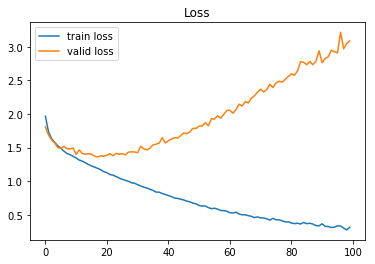

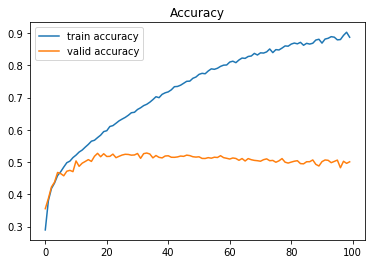

In [8]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

**500 epochs**

In [10]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.1941 - acc: 0.9355 - val_loss: 2.9901 - val_acc: 0.5071
Epoch 2/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.1619 - acc: 0.9506 - val_loss: 2.9899 - val_acc: 0.5096
Epoch 3/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.1519 - acc: 0.9553 - val_loss: 2.9936 - val_acc: 0.5103
Epoch 4/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.1462 - acc: 0.9578 - val_loss: 2.9933 - val_acc: 0.5095
Epoch 5/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.1425 - acc: 0.9594 - val_loss: 2.9970 - val_acc: 0.5086
Epoch 6/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.1397 - acc: 0.9599 - val_loss: 2.9994 - val_acc: 0.5095
Epoch 7/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.1376 - acc: 0.9607 - val_loss: 3.0034 - 

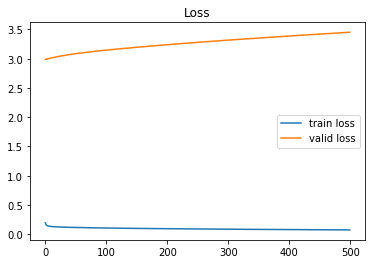

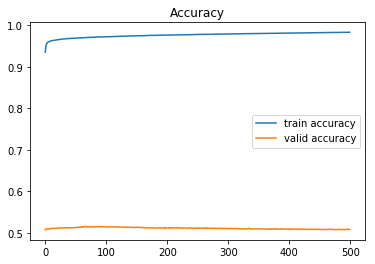

In [11]:
# 以視覺畫方式檢視訓練過程
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

**SGD**

In [9]:
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.0738 - acc: 0.9835 - val_loss: 3.4516 - val_acc: 0.5073
Epoch 2/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.0737 - acc: 0.9835 - val_loss: 3.4533 - val_acc: 0.5073
Epoch 3/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.0737 - acc: 0.9835 - val_loss: 3.4534 - val_acc: 0.5081
Epoch 4/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.0736 - acc: 0.9836 - val_loss: 3.4542 - val_acc: 0.5080
Epoch 5/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.0736 - acc: 0.9836 - val_loss: 3.4551 - val_acc: 0.5078
Epoch 6/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.0735 - acc: 0.9836 - val_loss: 3.4559 - val_acc: 0.5083
Epoch 7/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.0735 - acc: 0.9836 - val_loss: 3.4555 - 

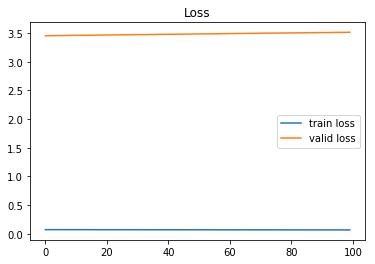

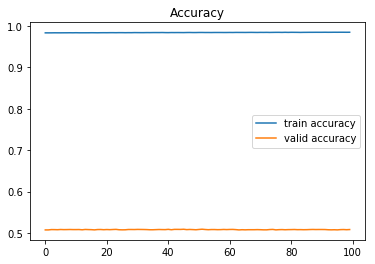

In [13]:
# 以視覺畫方式檢視訓練過程
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()